# Stock Market Prediction using Numerical and Textual Analysis

# Aman Gupta

In [1]:
!pip install nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

import seaborn as sns

import nltk
#VADER ( Valence Aware Dictionary for Sentiment Reasoning) is a model used for
# text sentiment analysis that is sensitive to both polarity (positive/negative) and intensity (strength) of emotion.
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\amang\AppData\Roaming\nltk_data...


True

In [10]:
stock_prices=pd.read_csv('historical_data.csv')

In [11]:
print(stock_prices.head())
print(stock_prices.size)

         Date          Open          High           Low         Close  \
0  2019-12-17  41052.359375  41401.648438  41005.179688  41352.171875   
1  2019-12-18  41442.750000  41614.769531  41358.468750  41558.570313   
2  2019-12-19  41571.820313  41719.289063  41456.398438  41673.921875   
3  2019-12-20  41746.199219  41809.960938  41636.109375  41681.539063   
4  2019-12-23  41548.261719  41701.621094  41474.609375  41642.660156   

      Adj Close   Volume  
0  41352.171875  19000.0  
1  41558.570313  24300.0  
2  41673.921875  33300.0  
3  41681.539063  33600.0  
4  41642.660156   6200.0  
1764


In [12]:
stock_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       252 non-null    object 
 1   Open       250 non-null    float64
 2   High       250 non-null    float64
 3   Low        250 non-null    float64
 4   Close      250 non-null    float64
 5   Adj Close  250 non-null    float64
 6   Volume     250 non-null    float64
dtypes: float64(6), object(1)
memory usage: 13.9+ KB


In [13]:
stock_headlines=pd.read_csv('india-news-headlines.csv')

In [14]:
print(stock_headlines.head())
print(stock_headlines.size)

   publish_date headline_category  \
0      20010102           unknown   
1      20010102           unknown   
2      20010102           unknown   
3      20010102           unknown   
4      20010102           unknown   

                                       headline_text  
0  Status quo will not be disturbed at Ayodhya; s...  
1                Fissures in Hurriyat over Pak visit  
2              America's unwanted heading for India?  
3                 For bigwigs; it is destination Goa  
4               Extra buses to clear tourist traffic  
10272201


In [15]:
#converting stock_prices['Date'] object to datetime datatype
stock_prices['Date']=pd.to_datetime(stock_prices['Date'])
stock_prices

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-12-17,41052.359375,41401.648438,41005.179688,41352.171875,41352.171875,19000.0
1,2019-12-18,41442.750000,41614.769531,41358.468750,41558.570313,41558.570313,24300.0
2,2019-12-19,41571.820313,41719.289063,41456.398438,41673.921875,41673.921875,33300.0
3,2019-12-20,41746.199219,41809.960938,41636.109375,41681.539063,41681.539063,33600.0
4,2019-12-23,41548.261719,41701.621094,41474.609375,41642.660156,41642.660156,6200.0
...,...,...,...,...,...,...,...
247,2020-12-11,46060.320313,46309.628906,45706.218750,46099.011719,46099.011719,26300.0
248,2020-12-14,46284.699219,46373.339844,45951.531250,46253.460938,46253.460938,18400.0
249,2020-12-15,46287.390625,46350.300781,45841.671875,46263.171875,46263.171875,16400.0
250,2020-12-16,46573.308594,46704.968750,46402.199219,46666.460938,46666.460938,13100.0


In [16]:
#detecting any null value
stock_prices.isnull().values.any()

True

In [17]:
#dropping any null value if any
stock_prices.dropna(inplace=True)

In [18]:
print(stock_prices.head())

        Date          Open          High           Low         Close  \
0 2019-12-17  41052.359375  41401.648438  41005.179688  41352.171875   
1 2019-12-18  41442.750000  41614.769531  41358.468750  41558.570313   
2 2019-12-19  41571.820313  41719.289063  41456.398438  41673.921875   
3 2019-12-20  41746.199219  41809.960938  41636.109375  41681.539063   
4 2019-12-23  41548.261719  41701.621094  41474.609375  41642.660156   

      Adj Close   Volume  
0  41352.171875  19000.0  
1  41558.570313  24300.0  
2  41673.921875  33300.0  
3  41681.539063  33600.0  
4  41642.660156   6200.0  


#combine the polarity of news to data and then predict the close price
#i.e. close price is to be determined

In [19]:
stock_headlines

,publish_date,headline_category,headline_text
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,20010102,unknown,Fissures in Hurriyat over Pak visit
2,20010102,unknown,America's unwanted heading for India?
3,20010102,unknown,For bigwigs; it is destination Goa
4,20010102,unknown,Extra buses to clear tourist traffic
...,...,...,...
3424062,20201231,city.jodhpur,Covid-19: Despite dip in cases; Rajasthan amon...
3424063,20201231,city.udaipur,Covid-19: Despite dip in cases; Rajasthan amon...
3424064,20201231,city.ajmer,Covid-19: Despite dip in cases; Rajasthan amon...
3424065,20201231,removed,Govt extends deadline for use of FASTag till F...


In [20]:
#converting stock_prices['Date'] object to datetime datatype
stock_headlines['publish_date'] = pd.to_datetime(stock_headlines['publish_date'],format= '%Y%m%d')
stock_headlines

,publish_date,headline_category,headline_text
0,2001-01-02,unknown,Status quo will not be disturbed at Ayodhya; s...
1,2001-01-02,unknown,Fissures in Hurriyat over Pak visit
2,2001-01-02,unknown,America's unwanted heading for India?
3,2001-01-02,unknown,For bigwigs; it is destination Goa
4,2001-01-02,unknown,Extra buses to clear tourist traffic
...,...,...,...
3424062,2020-12-31,city.jodhpur,Covid-19: Despite dip in cases; Rajasthan amon...
3424063,2020-12-31,city.udaipur,Covid-19: Despite dip in cases; Rajasthan amon...
3424064,2020-12-31,city.ajmer,Covid-19: Despite dip in cases; Rajasthan amon...
3424065,2020-12-31,removed,Govt extends deadline for use of FASTag till F...


In [21]:
#dropping any duplicate value
stock_headlines.drop_duplicates()

,publish_date,headline_category,headline_text
0,2001-01-02,unknown,Status quo will not be disturbed at Ayodhya; s...
1,2001-01-02,unknown,Fissures in Hurriyat over Pak visit
2,2001-01-02,unknown,America's unwanted heading for India?
3,2001-01-02,unknown,For bigwigs; it is destination Goa
4,2001-01-02,unknown,Extra buses to clear tourist traffic
...,...,...,...
3424062,2020-12-31,city.jodhpur,Covid-19: Despite dip in cases; Rajasthan amon...
3424063,2020-12-31,city.udaipur,Covid-19: Despite dip in cases; Rajasthan amon...
3424064,2020-12-31,city.ajmer,Covid-19: Despite dip in cases; Rajasthan amon...
3424065,2020-12-31,removed,Govt extends deadline for use of FASTag till F...


In [22]:
#taking only publish_date column and headline_text
stock_headlines = stock_headlines.filter(['publish_date', 'headline_text'])

In [23]:
# grouping the news headlines according to Date
stock_headlines = stock_headlines.groupby(['publish_date'])['headline_text'].apply(lambda x: ','.join(x)).reset_index()

In [24]:
#sorting the values according to publish_date
stock_headlines=stock_headlines.sort_values(by='publish_date')

In [25]:
stock_headlines

,publish_date,headline_text
0,2001-01-02,Status quo will not be disturbed at Ayodhya; s...
1,2001-01-03,"Powerless north India gropes in the dark,Think..."
2,2001-01-04,The string that pulled Stephen Hawking to Indi...
3,2001-01-05,Light combat craft takes India into club class...
4,2001-01-06,Light combat craft takes India into club class...
...,...,...
7257,2020-12-27,#BigInterview! Dhritiman Chatterjee: Nobody da...
7258,2020-12-28,Horoscope Today; 28 December 2020: Check astro...
7259,2020-12-29,Man recovers charred remains of 'thief' from h...
7260,2020-12-30,Numerology Readings 30 December 2020: Predicti...


In [26]:
#renaming column 'publish_date' to 'Date'
stock_headlines.columns=['Date','headline_text']

In [27]:
stock_headlines

,Date,headline_text
0,2001-01-02,Status quo will not be disturbed at Ayodhya; s...
1,2001-01-03,"Powerless north India gropes in the dark,Think..."
2,2001-01-04,The string that pulled Stephen Hawking to Indi...
3,2001-01-05,Light combat craft takes India into club class...
4,2001-01-06,Light combat craft takes India into club class...
...,...,...
7257,2020-12-27,#BigInterview! Dhritiman Chatterjee: Nobody da...
7258,2020-12-28,Horoscope Today; 28 December 2020: Check astro...
7259,2020-12-29,Man recovers charred remains of 'thief' from h...
7260,2020-12-30,Numerology Readings 30 December 2020: Predicti...


In [28]:
#merging stock_prices and stock_headlines w.r.t to date
stock_data=pd.merge(stock_prices,stock_headlines, on='Date')

In [29]:
stock_data

,Date,Open,High,Low,Close,Adj Close,Volume,headline_text
0,2019-12-17,41052.359375,41401.648438,41005.179688,41352.171875,41352.171875,19000.0,After Jagannath Temple; Puri beach devpt plan ...
1,2019-12-18,41442.750000,41614.769531,41358.468750,41558.570313,41558.570313,24300.0,What is Citizenship (Amendment) Bill 2019: All...
2,2019-12-19,41571.820313,41719.289063,41456.398438,41673.921875,41673.921875,33300.0,Only 61% of CCA covered after revamp of canals...
3,2019-12-20,41746.199219,41809.960938,41636.109375,41681.539063,41681.539063,33600.0,I'm done playing the good girl; I want to be a...
4,2019-12-23,41548.261719,41701.621094,41474.609375,41642.660156,41642.660156,6200.0,Weekly Horoscope; December 22-28: Check predic...
...,...,...,...,...,...,...,...,...
245,2020-12-11,46060.320313,46309.628906,45706.218750,46099.011719,46099.011719,26300.0,Ways to get you in the mood for sex when you'r...
246,2020-12-14,46284.699219,46373.339844,45951.531250,46253.460938,46253.460938,18400.0,"No threat from Covid claims to balance sheets,..."
247,2020-12-15,46287.390625,46350.300781,45841.671875,46263.171875,46263.171875,16400.0,1;147 RT-PCR tests in a day; only 3 found +ve ...
248,2020-12-16,46573.308594,46704.968750,46402.199219,46666.460938,46666.460938,13100.0,Asmita Sood's favourite holiday destinations a...


<AxesSubplot:>

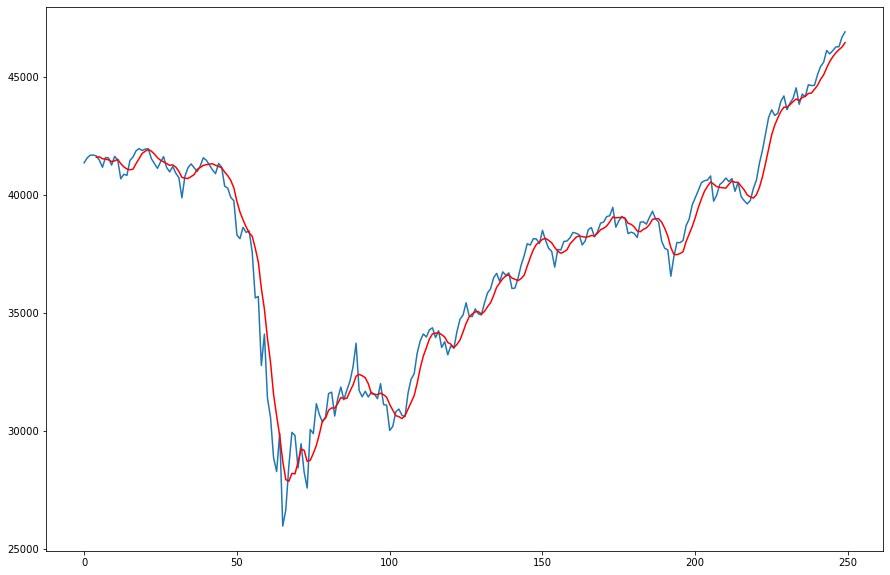

In [30]:
# Setting figure size
plt.figure(figsize=(15,10))

# Plotting the close price and  rolling mean of close price
stock_data['Close'].plot()
mean=stock_data['Close'].rolling(window=5).mean()

mean.plot(color = 'r', label = 'Rolling Mean')


In [31]:
# Doing the sentiment analysis of the headlines
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()
print('Start calculating sentiment scores:')

stock_data['compound'] = stock_data['headline_text'].apply(lambda x: sid.polarity_scores(x)['compound'])
print('Compound Done')

Start calculating sentiment scores:
Compound Done


Text(0, 0.5, 'Close Price (INR)')

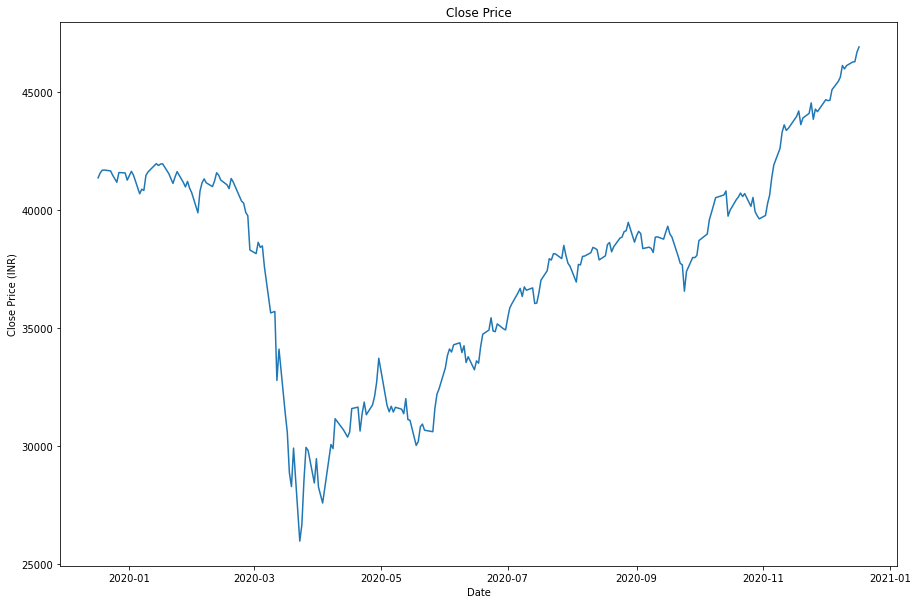

In [32]:
#Setting plot size and labels
plt.figure(figsize=(15,10))

plt.plot(stock_data['Date'],stock_data['Close'])


plt.title("Close Price")
plt.xlabel('Date')
plt.ylabel('Close Price (INR)')

In [33]:
stock_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,headline_text,compound
0,2019-12-17,41052.359375,41401.648438,41005.179688,41352.171875,41352.171875,19000.0,After Jagannath Temple; Puri beach devpt plan ...,-1.0000
1,2019-12-18,41442.750000,41614.769531,41358.468750,41558.570313,41558.570313,24300.0,What is Citizenship (Amendment) Bill 2019: All...,-0.9999
2,2019-12-19,41571.820313,41719.289063,41456.398438,41673.921875,41673.921875,33300.0,Only 61% of CCA covered after revamp of canals...,-0.9997
3,2019-12-20,41746.199219,41809.960938,41636.109375,41681.539063,41681.539063,33600.0,I'm done playing the good girl; I want to be a...,-0.9999
4,2019-12-23,41548.261719,41701.621094,41474.609375,41642.660156,41642.660156,6200.0,Weekly Horoscope; December 22-28: Check predic...,-0.9997


In [34]:
# Dropping unwanted 'headline_text' and rearranging columns
stock_data.drop(['headline_text'], inplace=True, axis=1)
stock_data = stock_data[[ 'Open', 'High', 'Low', 'Volume', 'compound', 'Close']]

# final stock_data
stock_data.head()

,Open,High,Low,Volume,compound,Close
0,41052.359375,41401.648438,41005.179688,19000.0,-1.0000,41352.171875
1,41442.750000,41614.769531,41358.468750,24300.0,-0.9999,41558.570313
2,41571.820313,41719.289063,41456.398438,33300.0,-0.9997,41673.921875
3,41746.199219,41809.960938,41636.109375,33600.0,-0.9999,41681.539063
4,41548.261719,41701.621094,41474.609375,6200.0,-0.9997,41642.660156


In [35]:
X=stock_data.iloc[:,:-1].values
Y=stock_data.iloc[:,-1].values

In [36]:
# Splitting the dataset into training and test set
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)


In [37]:
# Data modelling
!pip install xgboost
import xgboost 
xgb = xgboost.XGBRegressor()
xgb.fit(X_train, Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [38]:
# Getting the prediction
predictions = xgb.predict(X_test)
X_test

array([[ 4.34440586e+04,  4.37084688e+04,  4.29702109e+04,
         3.03000000e+04,  9.97400000e-01],
       [ 3.33715195e+04,  3.42760117e+04,  3.33715195e+04,
         2.12000000e+04, -9.99700000e-01],
       [ 3.15776309e+04,  3.19708398e+04,  3.11587500e+04,
         1.92000000e+04, -9.98700000e-01],
       [ 3.79468008e+04,  3.82213984e+04,  3.77551016e+04,
         1.66000000e+04, -9.99300000e-01],
       [ 3.75957305e+04,  3.75960195e+04,  3.69112305e+04,
         1.43000000e+04, -9.99500000e-01],
       [ 3.83211289e+04,  3.84143711e+04,  3.81258086e+04,
         2.53000000e+04, -9.99700000e-01],
       [ 3.89567812e+04,  3.92638516e+04,  3.88198906e+04,
         1.55000000e+04, -9.98900000e-01],
       [ 3.08561406e+04,  3.14711406e+04,  3.05785508e+04,
         2.10000000e+04, -9.99700000e-01],
       [ 2.77733594e+04,  2.93705293e+04,  2.67144609e+04,
         3.32000000e+04, -9.99900000e-01],
       [ 3.70928594e+04,  3.77456016e+04,  3.69877305e+04,
         1.51000000e+04

Text(0, 0.5, 'Stock Price')

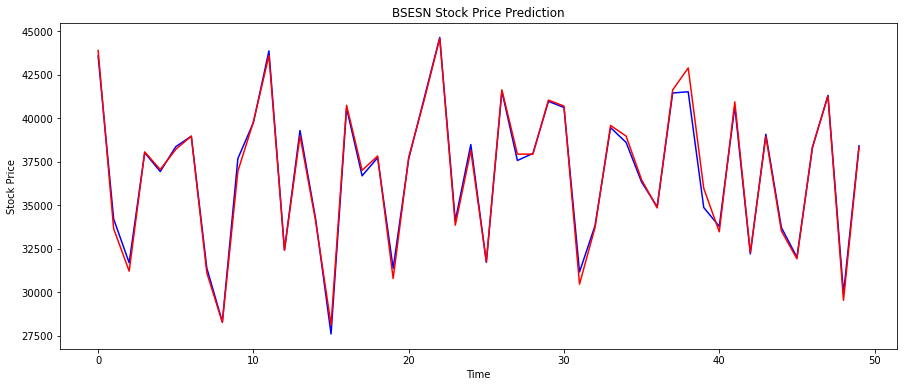

In [39]:
# Plotting prediction w.r.t Y_test
plt.figure(figsize=(15,6))
plt.plot(Y_test, label='Test', color='b')
plt.plot(predictions, label='Prediction', color='r')
plt.title('BSESN Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')

In [40]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(predictions, Y_test)
mse

135542.43661112248

In [41]:
from sklearn.metrics import explained_variance_score
print(explained_variance_score(predictions,Y_test))

0.9923830845797235


In [43]:
import pickle
pickle.dump(xgb,open("xgb_regressor1.pkl","wb"))